## The Microsoft Sci-fi Project - A&J Analytica

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They also want to capture a niche and create only sci-fi movies. They have hired A&J Analytica to help them better understand the scifi genre. Your team is charged with doing data analysis and creating a presentation that explores what type of sci-fi films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

## Our approach:

     
     



In [1]:
#import packages needed

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import json
import requests
from bs4 import BeautifulSoup
from re import sub
from decimal import Decimal
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    #'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

import matplotlib.ticker as ticker

In [4]:
#merging data from TMDB API dataset and Movie Mojo webscraped dataset
#cleaning merged data by dropping unneeded columns & renaming columns

df1=pd.read_csv('mdbv2.csv',index_col=0)
df2=pd.read_csv('movie_subgenres.csv',index_col=0)
df1.reset_index(inplace=True)
df1.rename(columns={'title':'Title'},inplace=True)
sci_fi_df=pd.merge(df1,df2,on='Title')
sci_fi_df.rename(columns={'Lifetime_Gross': 'Revenue'},inplace=True)
sci_fi_df.rename(columns={'popularity': 'Popularity','vote_count':'Vote_Count', 
                          'vote_average': 'Vote_Average','release_date':'Release_Date'},inplace=True)
sci_fi_df.rename(columns={'genre':'Genre'},inplace=True)
sci_fi_df.drop(['mdb_id','Date_Released'],axis=1, inplace=True)
ratings_df=pd.read_csv('Ratings.csv')

In [5]:
#merging third dataset from OMDB for movie ratings
scifi_df=pd.merge(ratings_df,sci_fi_df,on='Title') 
scifi_df.columns

Index(['Unnamed: 0', 'Title', 'Rating', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Release_Date', 'Genre', 'Revenue', 'Subgenre'],
      dtype='object')

In [8]:
#cleaning full DF, dropping extra column
#scifi_df.drop(columns='Unnamed: 0',inplace=True)

scifi_df #final DF with all three datasets merged 

,Title,Rating,Popularity,Vote_Count,Vote_Average,Release_Date,Genre,Revenue,Subgenre
0,Sunshine,R,23.118,2228,7.0,2007-04-05,sci-fi,3675753,Future
1,Prometheus,R,31.760,8222,6.4,2012-05-30,sci-fi,126477084,Robot
2,Prometheus,R,31.760,8222,6.4,2012-05-30,sci-fi,126477084,Future
3,Fantastic Four,PG-13,29.840,6401,5.7,2005-06-29,sci-fi,154696080,Superhero
4,Fantastic Four,PG-13,29.840,6401,5.7,2005-06-29,sci-fi,56117548,Superhero
...,...,...,...,...,...,...,...,...,...
283,Hellboy,PG-13,23.477,1722,5.3,2019-04-10,sci-fi,59623958,Superhero
284,The Incredible Hulk,PG-13,39.485,7322,6.2,2008-06-12,sci-fi,134806913,Superhero
285,Arrival,PG-13,36.084,11913,7.5,2016-11-10,sci-fi,100546139,Alien_Invasion
286,The Host,PG-13,13.322,3085,6.3,2013-03-22,sci-fi,26627201,Alien_Invasion


### What is the title,subgenre and rating of the sci-fi film with the highest generated revenue? How does this compare to the highest rated movie (using popularity score)?

Highest Revenue: Avengers: Endgame, Supernatural, PG-13

Highest Popularity Score: Spider-Man: Far From Home, Supernatural, PG-13

In [25]:
#return movie details for highest generated revenue
#return movie details for higest rated by vote average

scifi_df.sort_values(by='Revenue',ascending=False).head(1)
scifi_df.sort_values(by='Popularity',ascending=False).head(1)

,Title,Rating,Popularity,Vote_Count,Vote_Average,Release_Date,Genre,Revenue,Subgenre
7,Spider-Man: Far from Home,PG-13,91.951,6800,7.5,2019-06-28,sci-fi,390532085,Supernatural


### What is the title, subgenre and rating of the sci-fi film with the lowest generated revenue? How does this compare to the lowest rated movie (using vote average)?

Lowest Revenue: Storage 24, Alien Invasion, R

Lowest Score: 1984, Future, R

In [22]:
#We sorted by Revenue and returned the title of the movie with the lowest generated revenue.

scifi_df[['Title', 'Revenue','Subgenre','Rating']].drop_duplicates(subset='Title',inplace=False).sort_values(by='Revenue',ascending=True).head(1)

#We sorted by Vote_Average and returned the title of the movie with the lowest rating.

scifi_df[['Title', 'Vote_Average','Subgenre','Rating']].drop_duplicates(subset='Title',inplace=False).sort_values(by='Vote_Average',ascending=True).head(1)

,Title,Vote_Average,Subgenre,Rating
175,1984,0.0,Future,R


### What does the average popularity score look like by subgenre?

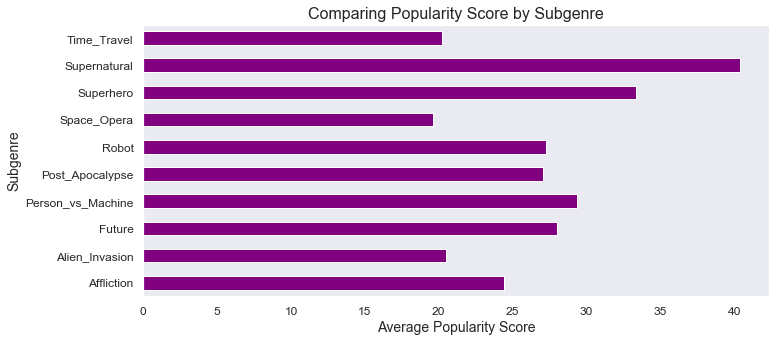

In [52]:
#plots each subgenre's average popularity score in a horizontal bar graph
#use of bar plot allows subgenres to be compared 

Avg_pop_by_sub=scifi_df.groupby('Subgenre')['Popularity'].mean()
Fig1=Avg_pop_by_sub.plot(kind='barh',figsize=(10,5),grid=False,color='purple')
Fig1.set_title('Comparing Popularity Score by Subgenre',fontdict={'size':16})
Fig1.set_xlabel('Average Popularity Score',fontdict={'size':14})
Fig1.set_ylabel('Subgenre',fontdict={'size':14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### How does each subgenre's average revenue compare?

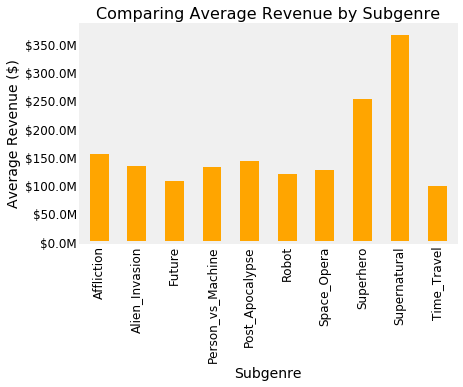

In [30]:
#plots each subgenre's revenue average in a vertical bar graph


Avg_rev_by_sub=scifi_df.groupby('Subgenre')['Revenue'].mean()
Fig2=Avg_rev_by_sub.plot(kind='bar',grid=False,color='orange')
Fig2.set_title('Comparing Average Revenue by Subgenre',fontdict={'size':16})
Fig2.set_xlabel('Subgenre',fontdict={'size':14})
Fig2.set_ylabel('Average Revenue ($)',fontdict={'size':14})
Fig2.yaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [53]:
#descriptive stats of the dataset
scifi_df.describe()

,Popularity,Vote_Count,Vote_Average,Revenue
count,288.000000,288.000000,288.000000,2.880000e+02
mean,28.006097,6424.965278,6.411806,1.698343e+08
std,16.298798,5242.019668,1.222467,1.708780e+08
min,0.600000,0.000000,0.000000,7.200000e+01
25%,16.040250,2059.250000,5.900000,4.389860e+07
50%,26.165500,5459.000000,6.600000,1.264771e+08
75%,37.971500,8903.750000,7.225000,2.339215e+08
max,91.951000,21978.000000,8.400000,8.583730e+08


In [50]:
#mean and median revenue of all sci-fi films

print('Median: $', round(scifi_df.drop_duplicates(subset='Title')['Revenue'].mean()/1000000),'Million')
print('Mean: $',round(scifi_df.drop_duplicates(subset='Title')['Revenue'].median()/1000000),'Million')

Median: $ 138 Million
Mean: $ 91 Million


In [148]:
mean = scifi_df.drop_duplicates(subset='Title')['Revenue'].mean()
median = scifi_df.drop_duplicates(subset='Title')['Revenue'].median()
supernatural_median = scifi_df[scifi_df['Subgenre']=='Supernatural'].drop_duplicates(subset='Title')['Revenue'].median()

In [149]:
supernatural_median

329138327.0

### How does the central tendency and distribution of the revenue of all Sci-Fi films look?

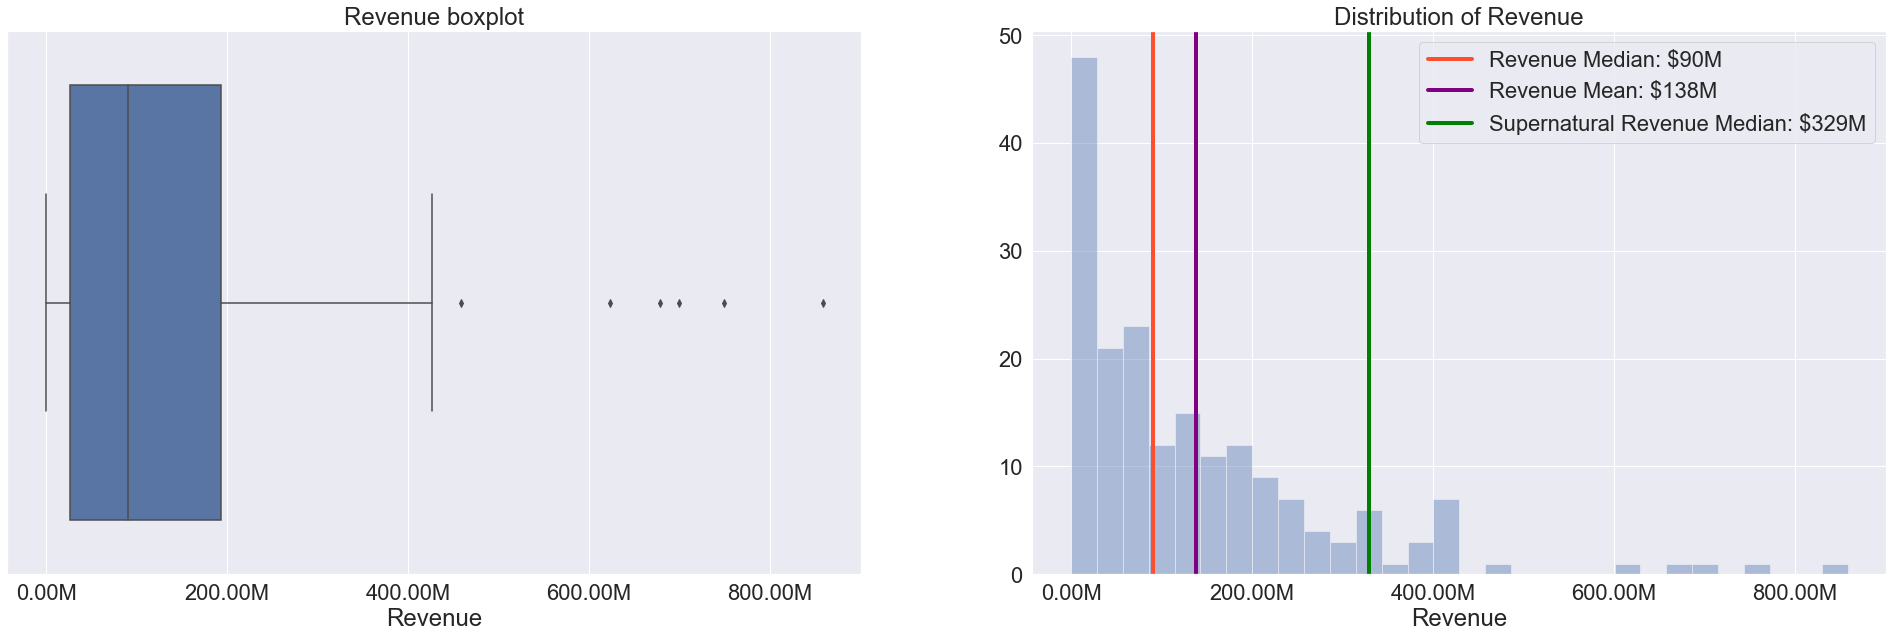

In [151]:
#the distribution is skewed slightly to the right 
#due to a few films with revenue over $600M

fig, (ax,ax2) = plt.subplots(ncols=2, figsize=(30,10))
sns.set(font_scale=2)
sns.set_style("darkgrid")


sns.distplot(scifi_df.drop_duplicates(subset='Title')['Revenue'], bins=30, ax=ax2, kde=False).set_title('Distribution of Revenue')

sns.boxplot(scifi_df.drop_duplicates(subset='Title')['Revenue'], ax=ax).set_title('Revenue boxplot')

color ='#fc4f30'
plt.axvline(median, color=color, label='Revenue Median: $90M', linewidth=4)  #median line
plt.axvline(mean, color='purple', label='Revenue Mean: $138M', linewidth=4)
plt.axvline(supernatural_median, color='green', label='Supernatural Revenue Median: $329M', linewidth=4)
plt.legend()

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

plt.show()


### What is the correlation of revenue and popularity?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


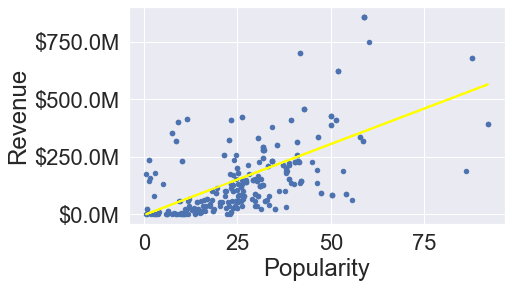

In [48]:
#scatterplot to show that popularity has a high correlation with revenue 

y = scifi_df.plot(kind='scatter',x='Popularity',y='Revenue')

m,b=np.polyfit(scifi_df['Popularity'], scifi_df['Revenue'], 1)
plt.plot(scifi_df['Popularity'], m*scifi_df['Popularity'] + b, linewidth = 2, color='yellow')

y.yaxis.set_major_formatter(formatter)

plt.show()

In [47]:
#Correlation between Revenue and Popularity

scifi_df['Revenue'].corr(scifi_df['Popularity'])

0.5884113320857991

### What are the Top 10 highest grossing Sci-Fi Movies? What is the distribution of ratings across the Top 10?

The top 10 highest grossing films all had ratings of PG-13.

In [44]:
#top 10 sci-fi movies determined by revenue 

top_10=scifi_df.drop_duplicates(subset='Title',inplace=False).sort_values(by='Revenue',ascending=False).head(10)
top_10_df=pd.DataFrame(top_10['Title'])
top_10_df.reset_index(inplace=True,drop=True)
top_10_df

,Title
0,Avengers: Endgame
1,Avatar
2,Black Panther
3,Avengers: Infinity War
4,The Avengers
5,Avengers: Age of Ultron
6,Captain Marvel
7,The Hunger Games: Catching Fire
8,Wonder Woman
9,Iron Man 3


In [46]:
#this shows the distribution of rating across the top 10
top_10['Rating'].value_counts()

PG-13    10
Name: Rating, dtype: int64

## Final Thoughts & Summary:

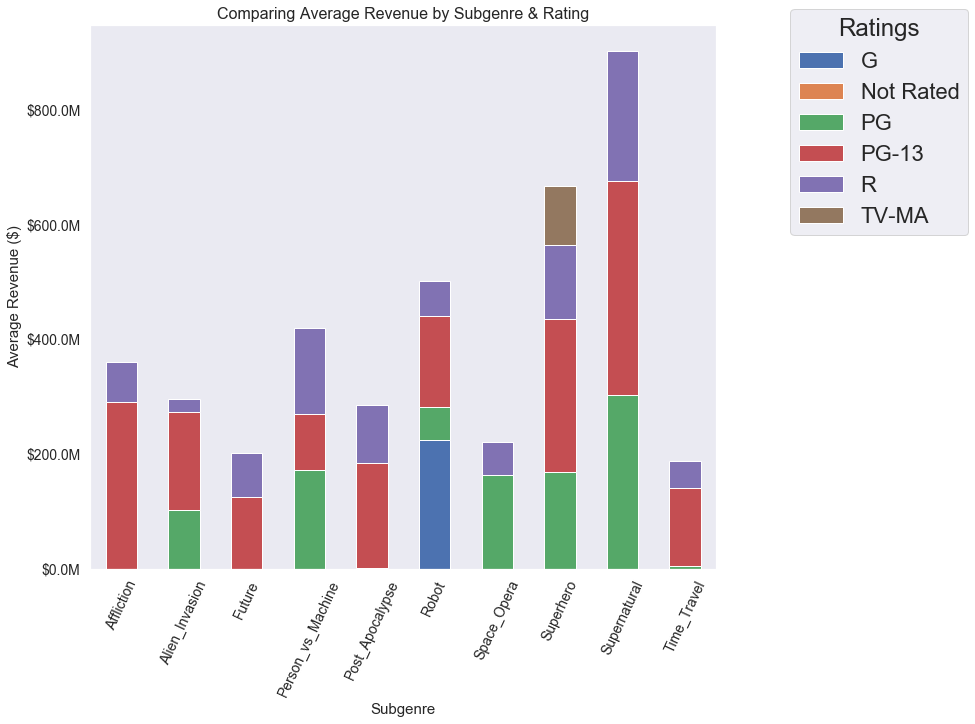

In [152]:
#final takeaway
#plot the revenue average of each subgenre and stacked rating


Avg_rev_by_ratings=scifi_df.groupby(['Subgenre','Rating'])['Revenue'].mean().unstack()
Fig100=Avg_rev_by_ratings.plot(kind='bar',grid=False,stacked=True,figsize=(10,10))
Fig100.set_title('Comparing Average Revenue by Subgenre & Rating',fontdict={'size':16})
Fig100.set_xlabel('Subgenre',fontdict={'size':15})
Fig100.set_ylabel('Average Revenue ($)',fontdict={'size':15})
Fig100.yaxis.set_major_formatter(formatter)
plt.xticks(fontsize=14,rotation=65)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1.1,1.05),title="Ratings")

plt.show()